## Final Project Submission

Please fill out:
* Student name: Liz Alvarez
* Student pace: Part time
* Scheduled project review date/time: July 8, 2019
* Instructor name: Jeff Herman
* Blog post URL: https://alvacat.github.io/project_one


# Exploring the Data

First, I need to take a look at the dataset to see what it looks like, what the variables are, how many rows are present, what types of data it's got, etc.

Here's an overview of what I'll be doing in this section:
* Import the libraries
    - I'll import all of the libraries that I think I'll need for this exploration. I'll need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels`,`sklearn`, and probably some others that will come up later.
* Load up the data and look at it
    - Load the data as a `pandas` dataframe
    - Look at the first few entries, the data types, etc.

And that's about it for this phase.  There'll be more in-depth exploration later but the data will need to be cleaned first.

## Importing the libraries

In [1]:
import numpy as np #for arrays and easier-to-use math
import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for prettier visualizations
import pandas as pd #for dataframes and loading up the dataset
import statsmodels.api as sm #for figuring out the regression model
from statsmodels.formula.api import ols #for figuring out the regression model
import scipy.stats as stats #for finding residuals
from sklearn.feature_selection import RFE #for selecting features
from sklearn.linear_model import LinearRegression #for figuring out the regression model a different way
from sklearn.model_selection import train_test_split #for splitting the data into testing/training subsets

%matplotlib inline 

## Loading up the data

In [2]:
king_co = pd.read_csv("kc_house_data.csv")

## Looking at the data

In [3]:
king_co.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I'm going to split the dataset into the training/testing datasets now so that I can get a better idea of how the model performs on completely unknown data.

In [4]:
predictors=king_co.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(predictors,king_co['price'],test_size=0.25)

In [5]:
king_co_train=x_train.join(y_train)
king_co_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 19188 to 563
Data columns (total 21 columns):
id               16197 non-null int64
date             16197 non-null object
bedrooms         16197 non-null int64
bathrooms        16197 non-null float64
sqft_living      16197 non-null int64
sqft_lot         16197 non-null int64
floors           16197 non-null float64
waterfront       14401 non-null float64
view             16149 non-null float64
condition        16197 non-null int64
grade            16197 non-null int64
sqft_above       16197 non-null int64
sqft_basement    16197 non-null object
yr_built         16197 non-null int64
yr_renovated     13310 non-null float64
zipcode          16197 non-null int64
lat              16197 non-null float64
long             16197 non-null float64
sqft_living15    16197 non-null int64
sqft_lot15       16197 non-null int64
price            16197 non-null float64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.3+ MB


There are 21 columns (or 22 if you cound the index).  Most of them are numbers but some of them aren't really numbers - like `waterfront` and `view`.  

For reference, here's what the variable names mean (I borrowed this info from the file `column_names.md` that's also in this repository.):

* `id` - unique identifier for a house
* `date` - date that the house was sold
* `price` -  prediction target
* `bedrooms` - number of bedrooms per house
* `bathrooms` -  number of bathrooms per bedroom
* `sqft_living` -  square footage of the home
* `sqft_lot` - square footage of the lot
* `floors` -  number of floors (levels) in house
* `waterfront` - whether the house has a view of a waterfront
* `view` - how many times the house has been viewed
* `condition` - how good the condition is (overall)
* `grade` - overall grade given to the housing unit, based on King County grading system
* `sqft_above` - square footage of house apart from basement
* `sqft_basement` - square footage of the basement
* `yr_built` - year when the house was built
* `yr_renovated` - year when the house was renovated
* `zipcode` - zip code
* `lat` - Latitude coordinate of the house
* `long` - Longitude coordinate of the house
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

# Cleaning the Data

In this section, I need to:
* determine which columns: 
    - have missing data
    - have duplicate data
    - have placeholder values (like -99) instead of actual values
* deal with those problems
* change categorical values to easier-to-work-with values (via OneHot encoding)
* scale/normalize the data so the magnitudes for each value are similar

## Determine which columns having missing, duplicated, or placeholder data

To start, I'm going to figure out which columns have missing or null values using the `.isnull()` function.

In [6]:
king_co_train.isnull().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1796
view               48
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2887
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

From that list, I can see that `waterfront`, `view`, and `yr_renovated` are missing data.  I'm going to figure out what percentage of the data is missing for each of those so I can figure out what to do about it.

In [7]:
print(f'{round(king_co.waterfront.isnull().sum()/len(king_co) * 100,2)}% of the waterfront data is missing.')
print(f'{round(king_co.view.isnull().sum()/len(king_co) * 100,2)}% of the view data is missing.')
print(f'{round(king_co.yr_renovated.isnull().sum()/len(king_co) * 100,2)}% of the yr_renovated data is missing.')

11.0% of the waterfront data is missing.
0.29% of the view data is missing.
17.79% of the yr_renovated data is missing.


There are not very many rows with the view data missing so I'll just drop those rows.

In [8]:
rows_to_drop=king_co_train.loc[king_co.view.isnull()==True]
king_co_train.drop(rows_to_drop.index,axis=0,inplace=True) 

And, just to make sure I've got the dataframe with all of the null views removed, I'm going to look at the number of null values.  If everything has worked correctly, there should be 0 rows listed.

In [9]:
king_co_train.view.isnull().sum()

0

Perfect.  Now I need to figure out what to do with the missing `waterfront` and `yr_renovated` data. 

### Question: When were most houses renovated?

I'm going to use a histogram to look at the data.  My guess is that, if `yr_renovated` is blank for a house, the house probably wasn't renovated at all.  I'm hoping that the histogram might give me some clues about what to do with those missing values though. (Maybe the histogram will suggest a value that I could impute for the missing data).

Text(0.5, 1.0, 'Histogram of Renovation Years')

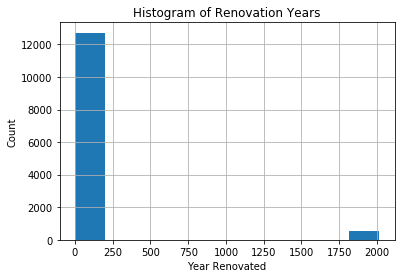

In [10]:
king_co_train.yr_renovated.hist()
plt.xlabel("Year Renovated")
plt.ylabel("Count")
plt.title("Histogram of Renovation Years")

Well... it looks like a lot of houses were renovated in the year `0.0`.  It's pretty safe to assume that anything renovated in `0.0` wasn't actually renovated.  This graph also tells me that most houses are not renovated so I think it's probably ok to assume that the null `yr_renovated` values probably indicate that the house wasn't renovated at all but I'm going to look at that a little bit more in a minute.

To deal with this column, I'm going to add a new variable called `renovated` that is a `0` if the house hasn't been renovated and a `1` if it has.  

In [11]:
king_co_train.loc[king_co_train['yr_renovated']>=0.0,"renovated"]=1
king_co_train.loc[(king_co_train['yr_renovated']==0.0),"renovated"]=0

In [12]:
king_co_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated
19188,6324000115,9/22/2014,3,2.00,2660,5000,1.5,0.0,3.0,3,...,720.0,1910,0.0,98116,47.5829,-122.382,2270,5000,727500.0,0.0
2622,3275890310,2/12/2015,3,2.00,2110,9199,1.0,0.0,0.0,3,...,0.0,1993,0.0,98074,47.6496,-122.083,3130,8841,677100.0,0.0
9939,3438502200,9/17/2014,4,2.75,2680,16934,1.0,NaN,0.0,4,...,1340.0,1958,NaN,98106,47.5420,-122.364,1240,7000,445000.0,NaN
11603,9510900140,4/6/2015,4,2.50,1900,7000,1.0,0.0,0.0,2,...,480.0,1968,0.0,98023,47.3092,-122.376,1600,7600,305000.0,0.0
3256,1137301780,11/26/2014,3,2.50,2180,40278,2.0,0.0,0.0,3,...,0.0,1985,NaN,98072,47.7330,-122.090,2630,40000,580000.0,NaN


In [13]:
print(f"null values: {king_co_train.renovated.isnull().sum()}")
print(king_co_train.renovated.value_counts())

null values: 2880
0.0    12715
1.0      554
Name: renovated, dtype: int64


The info above tells me that there are about 5 times as many null values as there are renovated houses.  The majority of houses haven't been renovated at all. 

In [14]:
print(f"null values: {round(king_co_train.renovated.isnull().sum()/len(king_co_train) * 100,2)}%")
print(round(king_co_train.renovated.value_counts()/len(king_co_train) * 100,2)) #changing the counts to percentages

null values: 17.83%
0.0    78.74
1.0     3.43
Name: renovated, dtype: float64


So, a lot of houses weren't renovated, a small percentage were, and we don't know about the others.  

### Question: Is there a relationship between `yr_renovated` and `yr_built`?

I think it's probably the case that the null values indicate that the houses weren't renovated but I can't say that for sure.  Maybe I can impute the values though?  I'm going to see what sort of relationship `yr_renovated` has with the other variables, like `yr_built` by making a scatterplot and seeing if there's a clear pattern that shows up.

Text(0.5, 1.0, 'Year Renovated vs Year Built')

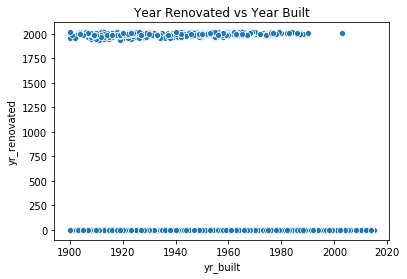

In [15]:
sns.scatterplot(king_co_train['yr_built'],king_co_train['yr_renovated'])
plt.title('Year Renovated vs Year Built')

It's tempting to throw out all the zeros but then I'd be making the assumption that the houses with missing renovation dates were renovated.  There doesn't seem to be any sort of obvious relationship between when a house was built and when it was renovated.  I think I'm just going to drop all of the rows missing the `yr_renovated` data after all.

In [16]:
rows_to_drop=king_co_train.loc[king_co_train.renovated.isnull()==True]
king_co_train.drop(rows_to_drop.index,axis=0,inplace=True)

In [17]:
king_co_train.drop('yr_renovated',axis=1,inplace=True)

Now, though, I need to deal with the waterfront data so I'm going to make a histogram of that, too, just to see what I'm working with.

Text(0.5, 1.0, 'Histogram of Waterfront Views')

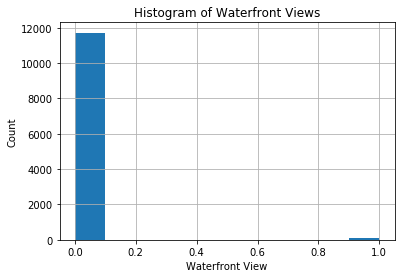

In [18]:
king_co_train.waterfront.hist()
plt.xlabel("Waterfront View")
plt.ylabel("Count")
plt.title("Histogram of Waterfront Views")

It's similar to the `yr_renovated` histogram but more extreme.

In [19]:
print(f"null values: {king_co_train.waterfront.isnull().sum()}")
print(king_co_train.waterfront.value_counts())

null values: 1463
0.0    11716
1.0       90
Name: waterfront, dtype: int64


My observations:
* There are a lot more null values than properties with a waterfront view. 
* The vast majority of houses don't have a waterfront view. 

In a couple months, I might be able to write some code that'll figure out if the `NaN` houses are near water but I have no idea how to do that right now. 

I think it's probably safe to just drop this whole column since it's unlikely the `waterfront` variable will have much of an effect on the model (because they're almost all the same value. In other words, there's not a significant enough population of houses with a waterfront view for the model to be accurately determined based on that).

In [20]:
king_co_train.drop(["waterfront"],axis=1,inplace=True)

Instead of doing a `.count_values()` for all the columns, I'm just going to go ahead and make histograms for them and we'll see if anything weird shows up that way. It'll be way faster than looking at each column individually.

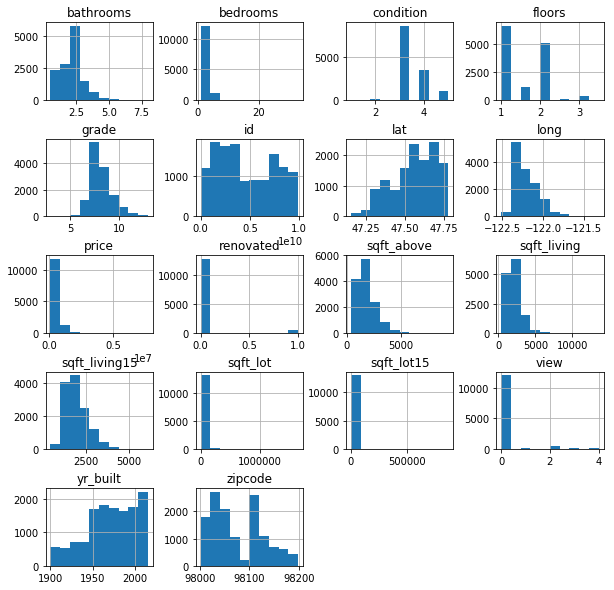

In [21]:
king_co_train.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5,wspace=0.4)

There are a couple of things that need further investigation.
* `id` is a unique identifier so it's interesting that the graph isn't a more uniform distribution.  It's probably because the ID numbers are binned but I want to look at it, just in case.
* There are 19 graphs but 21 columns.  All 21 of the columns were listed as being numerical so theoretically, they should all be able to be graphed as histograms. Comparing the column names to the graphs, I see that there are no graphs for `date` or `sqft_basement` so I'll look at both of those separately.

First, I'm just going to look at what values show up in the `id` column using the `.value_counts()` function.

In [22]:
king_co_train['id'].value_counts()

2231500030    2
4031000520    2
4204400098    2
2422049104    2
3185600040    2
6300000226    2
3293700496    2
5249801440    2
5054800110    2
1788900230    2
1995200200    2
1232000810    2
5132000140    2
3630120700    2
8564860270    2
1788800630    2
1000102       2
1901600090    2
8910500150    2
3333002450    2
1231000510    2
8820903380    2
8682262400    2
526059224     2
1423049019    2
4364700600    2
9834200885    2
1823049202    2
6143000020    2
7520000520    2
             ..
2322059136    1
2953000300    1
7203140360    1
2326300010    1
104530240     1
809002390     1
461003835     1
11510310      1
4102000075    1
9485920120    1
7974700122    1
6804600260    1
3142600130    1
9283800050    1
333100265     1
2767601085    1
1702901180    1
2326300090    1
993002127     1
2909300150    1
1508210100    1
7857003953    1
1822500270    1
9831200172    1
9828701608    1
8010100135    1
3735901600    1
7214800240    1
1494300060    1
582000644     1
Name: id, Length: 13202,

`id` is supposed to be a unique identifier so there shouldn't be more than 1 value for each id (unless the house was sold multiple times at different prices).  Let's check out some of the houses that show up more than once.

In [23]:
king_co_train.loc[king_co_train['id'].duplicated(keep=False)].sort_values('id').head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated
2494,1000102,9/16/2014,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316,280000.0,0.0
2495,1000102,4/22/2015,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316,300000.0,0.0
7786,251300110,1/14/2015,3,2.25,2510,12013,2.0,0.0,3,8,2510,0.0,1988,98003,47.3473,-122.314,1870,8017,358000.0,0.0
7785,251300110,7/31/2014,3,2.25,2510,12013,2.0,0.0,3,8,2510,0.0,1988,98003,47.3473,-122.314,1870,8017,225000.0,0.0
9225,302000375,8/14/2014,3,2.00,1050,18304,1.0,0.0,4,7,1050,0.0,1953,98001,47.3206,-122.269,1690,15675,169100.0,0.0


Looking at the first ID number that repeats, I see that the the dates are different so it looks like this house just sold multiple times.  I could choose to keep all of the datapoints (since a house with those qualities sold for different prices at different times) or I could just keep the last date because it indicates what the house is worth at the most recent point in time.  I'm going to keep all because I think the date will end up being an important part of the model.  (Although I might be engaging in some circular reasoning here - I'm keeping both dates so `date` will end up being more heavily weighted since the other qualities don't change from one entry to the next.)

I could check each one of the repeated ID numbers to make sure that the rows aren't duplicated...or I could write some code to do it.

In [24]:
king_co_train[king_co_train.duplicated()].sort_values('id')

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated


So, it looks like, even though the `id` might be repeated, there aren't actually any duplicated rows in the dataset.

The next thing to check out is the `date` column.  

In [25]:
king_co_train.date.dtype

dtype('O')

It's an object right now so I'm going to make sure it's a date-time object.

In [26]:
king_co_train['date']=pd.to_datetime(king_co_train['date'])

Much better.  Now I'm going to create new columns: `month`, `day`, and `year` because I think that the month and/or year may have an effect on the price of the house and it'll be easier if they're separate columns.

In [27]:
king_co_train['year'] = king_co_train['date'].dt.year
king_co_train['month'] = king_co_train['date'].dt.month
king_co_train['day'] = king_co_train['date'].dt.day

In [28]:
king_co_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated,year,month,day
19188,6324000115,2014-09-22,3,2.00,2660,5000,1.5,3.0,3,8,...,98116,47.5829,-122.382,2270,5000,727500.0,0.0,2014,9,22
2622,3275890310,2015-02-12,3,2.00,2110,9199,1.0,0.0,3,10,...,98074,47.6496,-122.083,3130,8841,677100.0,0.0,2015,2,12
11603,9510900140,2015-04-06,4,2.50,1900,7000,1.0,0.0,2,7,...,98023,47.3092,-122.376,1600,7600,305000.0,0.0,2015,4,6
17327,4232902335,2014-08-14,5,4.00,2710,2800,3.0,0.0,3,10,...,98119,47.6346,-122.364,1530,3600,1200000.0,1.0,2014,8,14
15679,2402100675,2015-02-10,3,3.75,2050,6000,2.0,0.0,5,7,...,98103,47.6873,-122.332,1780,4000,645000.0,0.0,2015,2,10


Ok, last thing to clean up is the `sqft_basement` column.  I suspect that a lot of houses might not have basements and so the data looks screwy but let's check it out:

In [29]:
king_co_train.sqft_basement.value_counts()

0.0       7900
?          279
600.0      128
400.0      126
700.0      121
500.0      121
800.0      107
1000.0      94
300.0       84
900.0       79
750.0       68
530.0       67
620.0       62
720.0       60
200.0       58
450.0       58
480.0       57
550.0       55
580.0       55
840.0       52
780.0       52
650.0       50
1100.0      50
240.0       50
860.0       50
420.0       49
670.0       48
360.0       47
910.0       46
880.0       46
          ... 
1798.0       1
2190.0       1
2570.0       1
2580.0       1
2360.0       1
704.0        1
1135.0       1
1281.0       1
3480.0       1
283.0        1
435.0        1
225.0        1
862.0        1
1284.0       1
861.0        1
518.0        1
207.0        1
1852.0       1
2196.0       1
1810.0       1
2030.0       1
1560.0       1
2160.0       1
414.0        1
415.0        1
295.0        1
2810.0       1
906.0        1
2310.0       1
4820.0       1
Name: sqft_basement, Length: 266, dtype: int64

A lot of the values are `0.0` which makes sense - if you don't have a basement, then your basement square footage is `0.0`.  The next one is weird though: a lot of houses have a basement with `?` square feet.  It looks like, instead of `NaN`, the null values for this column are instead listed as `?`. I'm going to drop the rows that have `?` basements.

In [30]:
rows_to_drop=king_co_train.loc[king_co_train.sqft_basement=='?']
king_co_train.drop(rows_to_drop.index,axis=0,inplace=True)

Now I need to change the type of the `sqft_basement` column so that it's a float (because it's way easier to do math with numbers than with strings).

In [31]:
king_co_train['sqft_basement']=king_co_train['sqft_basement'].astype('float64')

## Dealing with Categorical Data

There's one more problem that needs addressed: categorical data.  Everything looks numerical but some of the variables actually represent categorical data.  Those columns are: `id`,`date`,`condition`,`grade`,`zipcode`, and `basement`.  `id` number is arbitrarily assigned to houses and won't be included in the regression model so it doesn't matter that it's categorical.  `date` was split up into `year`, `month`, and `day` which are all interval variables so that should be fine already (I think).  `condition` and `grade` are ordinal, which means that the order matters but that's it - so I should probably split those into dummy variables.  `zipcode` is categorical because the zipcodes are technically numbers but they don't have a particular order (e.g. `90210` isn't before `90211` because "before" doesn't really mean anything when talking about zipcodes.) 

First I'll fix condition. I'm going to look at the value counts.

In [32]:
king_co_train.condition.value_counts()

3    8394
4    3423
5    1045
2     109
1      19
Name: condition, dtype: int64

Looks like there are 5 different possible conditions.  So, I'll do some OneHot encoding for `condition`.

In [33]:
conditions=pd.get_dummies(king_co_train['condition'],prefix="condition")

Now I'm going to look at the grades.

In [34]:
king_co_train['grade'].value_counts()

7     5430
8     3650
9     1581
6     1219
10     657
11     241
5      132
12      57
4       15
13       7
3        1
Name: grade, dtype: int64

It has 11 different values..not a small number but it's not huge either so I'll OneHot encode this, too.

In [35]:
grades=pd.get_dummies(king_co_train['grade'],prefix='grade')
grades.head()

,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
19188,0,0,0,0,0,1,0,0,0,0,0
2622,0,0,0,0,0,0,0,1,0,0,0
11603,0,0,0,0,1,0,0,0,0,0,0
17327,0,0,0,0,0,0,0,1,0,0,0
15679,0,0,0,0,1,0,0,0,0,0,0


Now I'll join `conditions` and `grades` with `king_co_train` so that it's one big dataframe.

In [36]:
king_co_train=king_co_train.join([conditions,grades])

In [37]:
king_co_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price', 'renovated', 'year', 'month', 'day', 'condition_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

`zipcode` is categorical so the mean and standard deviation don't really mean anything.  Zipcode is problematic, actually, since there are 70 different zipcodes possible - which seems like too many to OneHot encode.  They could be grouped, somehow - maybe by location?  Honestly, since we have latitude and longitude, I think that zipcode may not be that important.  The latitude and longitude tell us much more specific locations than the zipcode would AND the latitude/longitude are continuous and numerical - way easier to work with.  So, I'm making the decision to ignore the zipcode when I make the model.

## Scaling and Normalizing

Some of the columns have a skewed distribution so I'm going to take the log to see if it makes their distributions more normal.  

### Question:  Which columns would benefit from a log transformation?

Before I commit to actually taking the log of all of the columns, I'm going to compare the shapes of their distributions before/after taking the log.  Some of the columns have entries with a value of `0` which means I'll need to take the `log(x+1)` instead (since the domain for a log is only positive numbers).  For `long`, I'll have to take the absolute value since those values are all around `-122`.  

In [38]:
maybe_log_columns=king_co_train.drop(['id','date','price','zipcode'],axis=1)
maybe_log_columns['long']=abs(maybe_log_columns['long'])

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


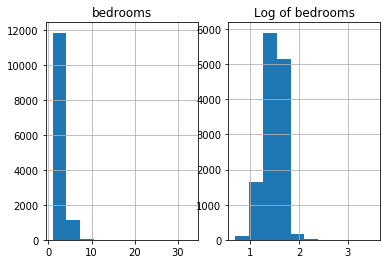

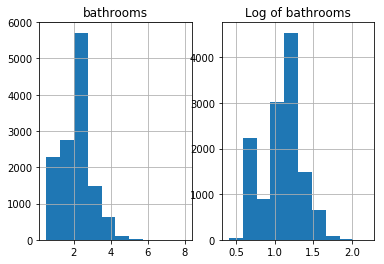

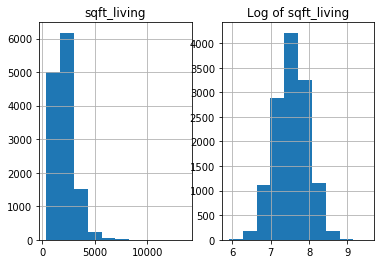

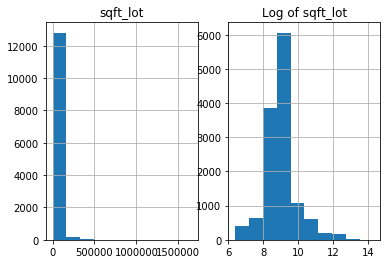

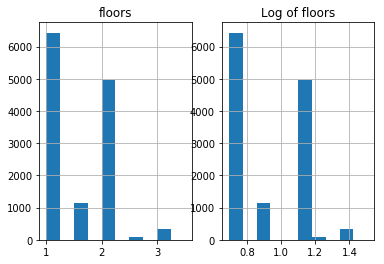

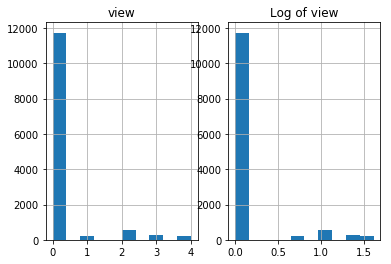

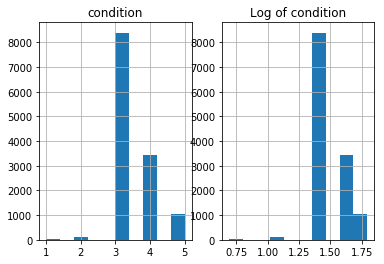

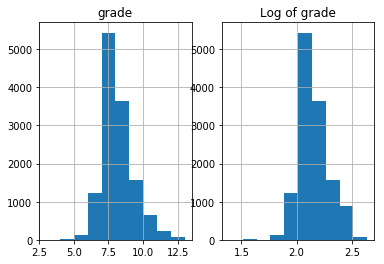

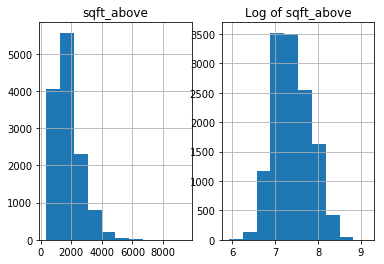

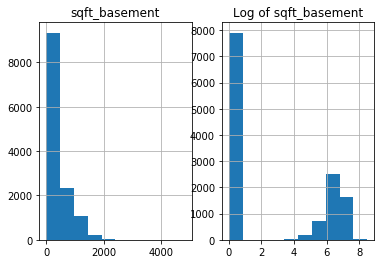

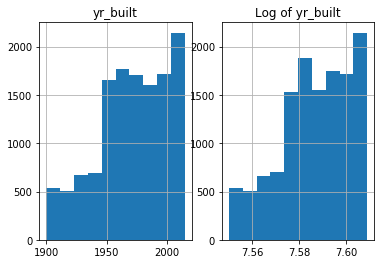

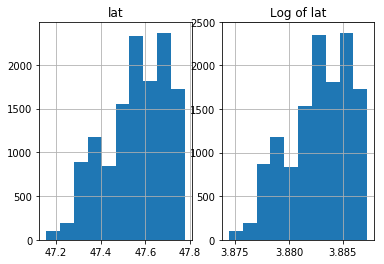

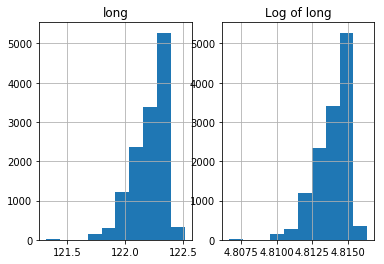

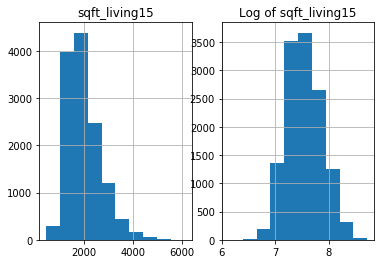

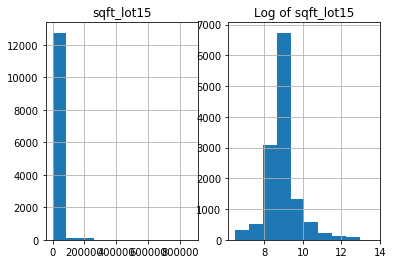

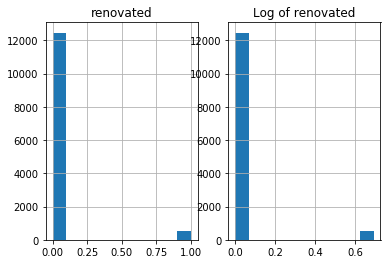

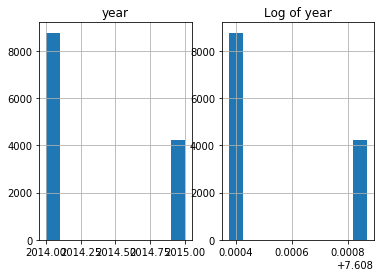

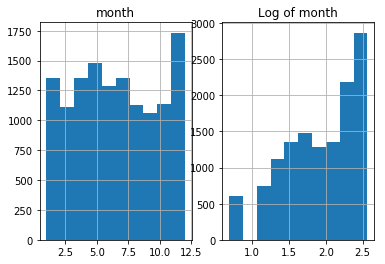

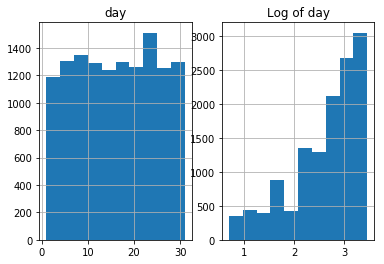

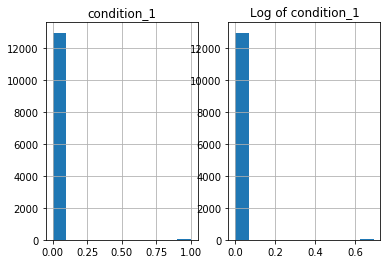

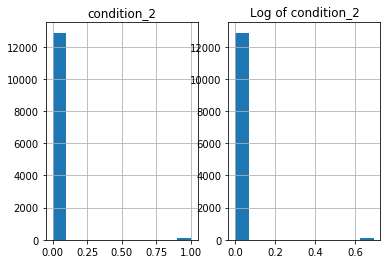

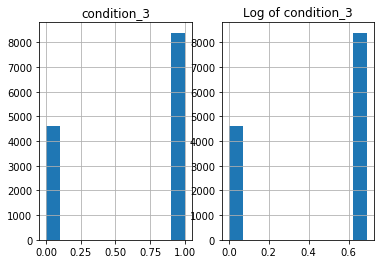

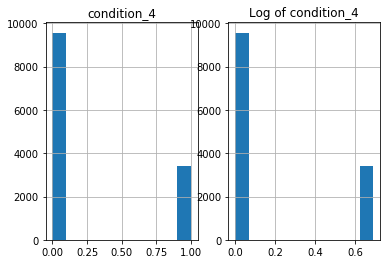

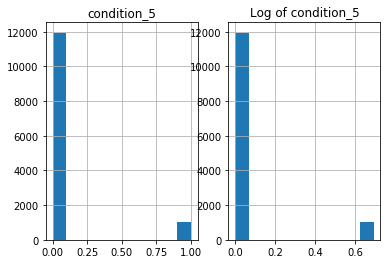

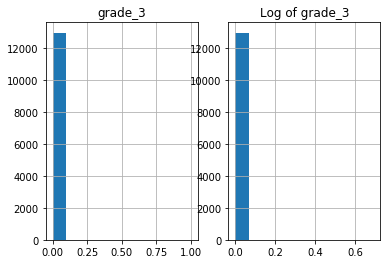

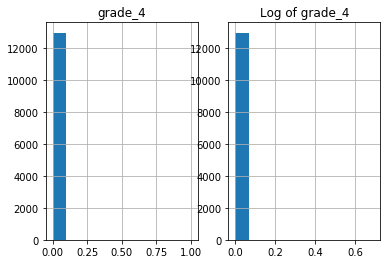

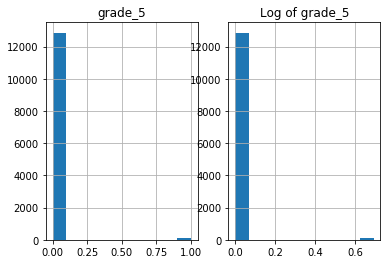

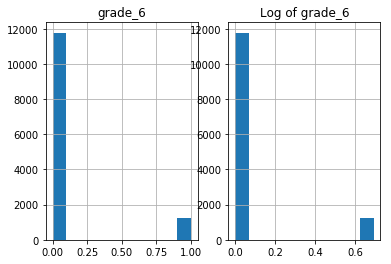

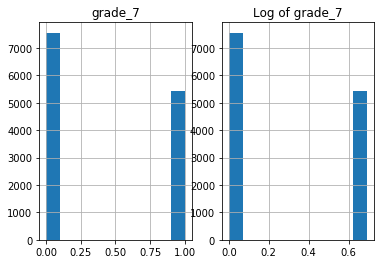

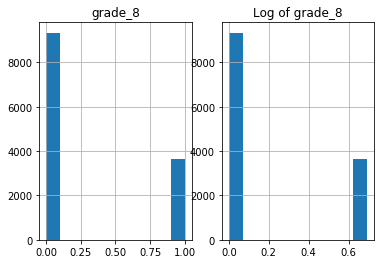

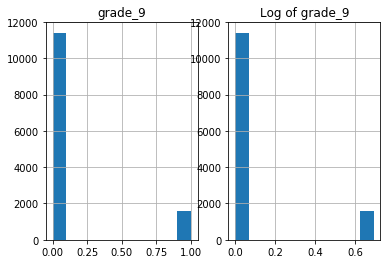

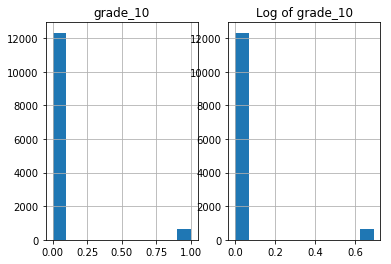

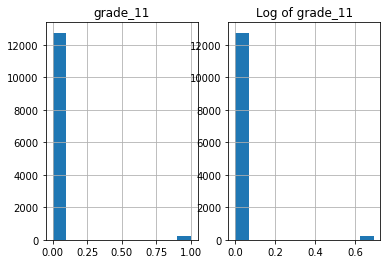

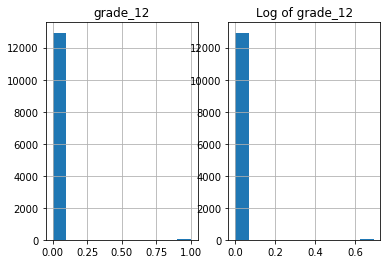

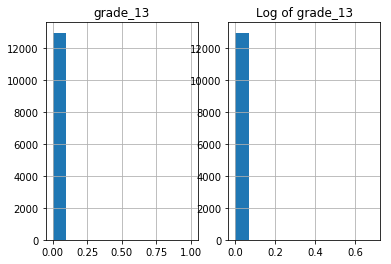

In [39]:
for column in maybe_log_columns:
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122)
    maybe_log_columns[column].hist(label=column,ax=ax1)
    column_log=np.log(maybe_log_columns[column]+1)
    column_log.hist(label=column +' log',ax=ax2)
    ax1.set_title(column)
    ax2.set_title("Log of " + column)

Taking the log helped `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_living15`, and `sqft_lot15` looked a lot more normal.  It didn't help the other columns so I'll leave those alone.

I noticed that a few of the grades/conditions are really one-sided which should mean they're not good predictors (since almost all the entries have the same values) so I'm going to drop some of those columns.

In [40]:
for column in king_co_train:
    if column.startswith("grade_")|column.startswith("condition_"):
        print(king_co_train[column].value_counts())
    else:
        continue

0    12971
1       19
Name: condition_1, dtype: int64
0    12881
1      109
Name: condition_2, dtype: int64
1    8394
0    4596
Name: condition_3, dtype: int64
0    9567
1    3423
Name: condition_4, dtype: int64
0    11945
1     1045
Name: condition_5, dtype: int64
0    12989
1        1
Name: grade_3, dtype: int64
0    12975
1       15
Name: grade_4, dtype: int64
0    12858
1      132
Name: grade_5, dtype: int64
0    11771
1     1219
Name: grade_6, dtype: int64
0    7560
1    5430
Name: grade_7, dtype: int64
0    9340
1    3650
Name: grade_8, dtype: int64
0    11409
1     1581
Name: grade_9, dtype: int64
0    12333
1      657
Name: grade_10, dtype: int64
0    12749
1      241
Name: grade_11, dtype: int64
0    12933
1       57
Name: grade_12, dtype: int64
0    12983
1        7
Name: grade_13, dtype: int64


In [41]:
columns_to_drop=['condition_1','grade_3','grade_4','grade_5','grade_11','grade_12','grade_13']
king_co_train.drop(columns_to_drop,axis=1,inplace=True)

In [42]:
log_columns=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']
for column in log_columns:
    king_co_train[column] = king_co_train[column].map(lambda x: np.log(x))

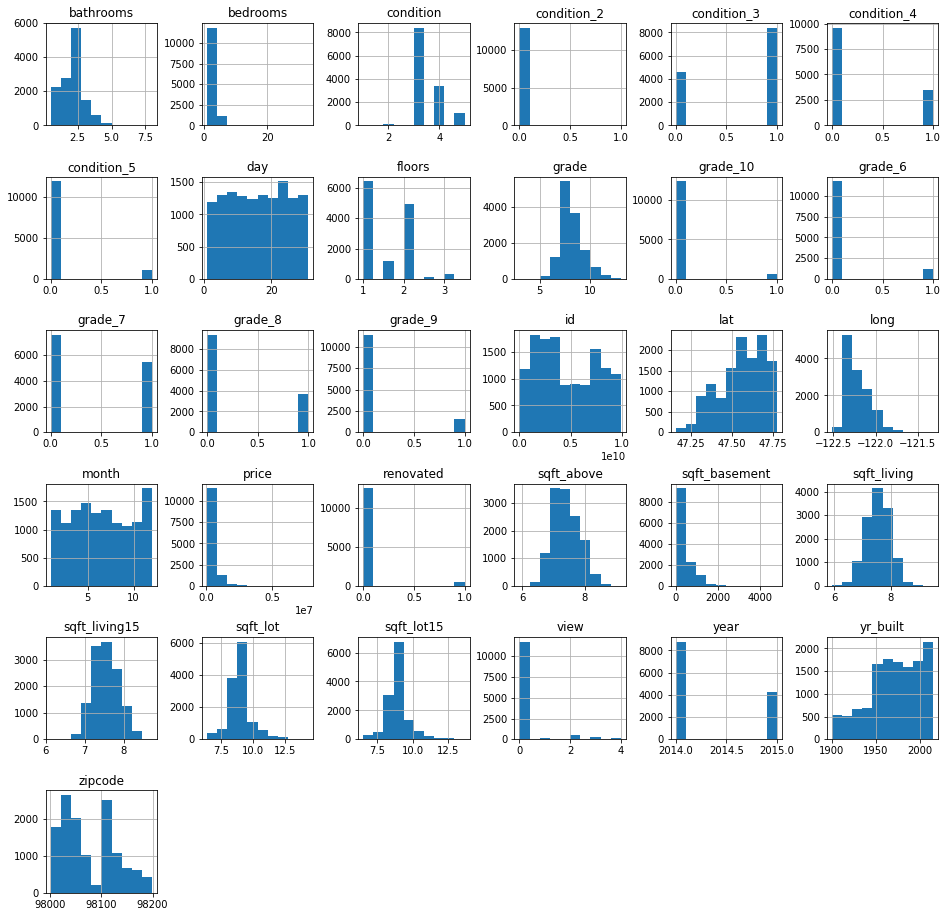

In [43]:
king_co_train.hist(figsize=(16,16))
plt.subplots_adjust(hspace=0.5,wspace=0.4)

Next up, scaling.  I could normalize the data - it won't change the shape/spread of the data and outliers aren't a problem - or I could use max/min scaling.  I tend to like normalizing better because it keeps all of the same info (aside from the original magnitudes) so I'm going to go with that.  It's also better with outliers than max/min scaling.

Not all of my data needs to be normalized either, since a lot of the values are already in the `0-1` range. So, I'm just going to normalize `bedrooms`, `day`, `grade`, `lat`, `long`, `month`, `sqft_above`, `sqft_basement`, `sqft_living15`, `sqft_lot`, `sqft_lot15`, `year`, and `yr_built`.

In [44]:
normal_columns=['bedrooms', 'day', 'grade', 'lat', 
                'long', 'month', 'sqft_above', 
                'sqft_basement', 'sqft_living15', 
                'sqft_lot', 'sqft_lot15', 'year', 
                'yr_built']
mean_std_for_later={}
for column in normal_columns:
    mean_column=king_co_train[column].mean()
    std_column=king_co_train[column].std()
    king_co_train[column] = king_co_train[column].map(lambda x: (x - mean_column)/std_column)
    mean_std_for_later.update({column:{'mean':mean_column,'std':std_column}})

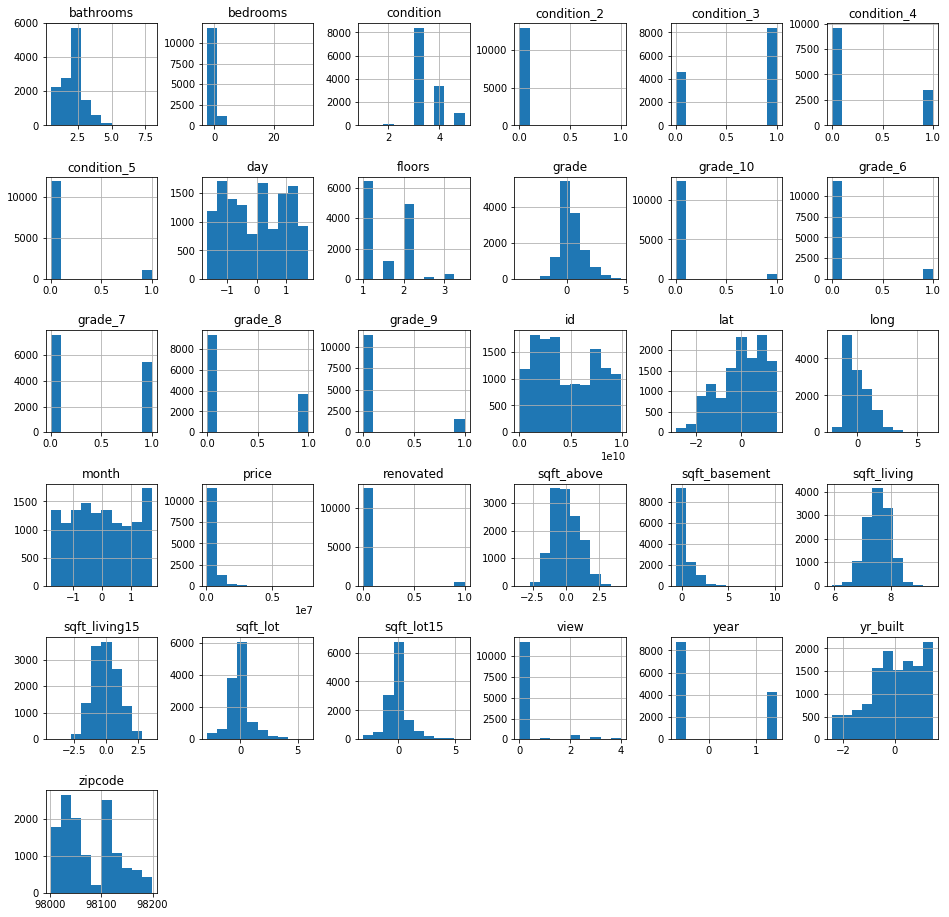

In [46]:
king_co_train.hist(figsize=(16,16))
plt.subplots_adjust(hspace=0.5,wspace=0.4)

One more thing - I'm going to drop the things that aren't useful (or that I'm pretty sure won't be good predictors for previously mentioned reasons).

In [47]:
king_co_train.drop(['date','id','zipcode'],axis=1,inplace=True)

In [48]:
king_co_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,day,condition_2,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10
19188,-0.403473,2.00,7.886081,-0.527126,1.5,3.0,3,0.293323,0.409618,0.964767,...,0.730969,0,1,0,0,0,0,1,0,0
2622,-0.403473,2.00,7.654443,0.150078,1.0,0.0,3,2.006569,0.607282,-0.658482,...,-0.426880,0,1,0,0,0,0,0,0,1
11603,0.661578,2.50,7.549609,-0.153374,1.0,0.0,2,-0.563301,-0.324637,0.423684,...,-1.121589,1,0,0,0,0,1,0,0,0
17327,1.726629,4.00,7.904704,-1.171185,3.0,0.0,3,2.006569,0.890630,0.085507,...,-0.195310,0,1,0,0,0,0,0,0,1
15679,-0.403473,3.75,7.625595,-0.324604,2.0,0.0,5,-0.563301,-0.118506,0.468775,...,-0.658450,0,0,0,1,0,1,0,0,0


# Data Exploration

Now that the data's cleaned up and useable, I'm going to try to narrow it down to the most useful variables.  The goal is to get the best model ('best' meaning that I want to maximize accuracy while minimizing the number of variables.  This thing needs to be efficient).

So, in this phase, I'm going to:
* determine which variables are highly correlated
    - and remove them!

I'm trying to find variables that are highly correlated so that I can figure out which variables could be eliminated from the model. I could try to make a scatterplot matrix but that's going to be a huge mess so I'm going to make a matrix of the correlation coefficients instead.  It'll be way easier to look at.

First up: the correlation coefficient with numbers.

In [49]:
king_co_train.drop(['price'],axis=1).corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,day,condition_2,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10
bedrooms,1.000000,0.502029,0.606729,0.172139,0.174389,0.076034,0.026442,0.344740,0.501328,0.295157,...,-0.003018,-0.052398,0.009963,-0.014840,0.029581,-0.235286,-0.099251,0.066085,0.158011,0.132123
bathrooms,0.502029,1.000000,0.761074,0.097504,0.499082,0.183979,-0.124830,0.663982,0.693793,0.279277,...,-0.005118,-0.079927,0.190743,-0.162740,-0.038413,-0.366501,-0.312011,0.188430,0.265212,0.263330
sqft_living,0.606729,0.761074,1.000000,0.323046,0.366614,0.245463,-0.053504,0.740093,0.862946,0.421123,...,-0.005812,-0.081808,0.103525,-0.077580,-0.022105,-0.393090,-0.324939,0.148460,0.335180,0.321536
sqft_lot,0.172139,0.097504,0.323046,1.000000,-0.237973,0.127990,0.066784,0.175526,0.312725,0.096460,...,-0.007336,0.040694,-0.114826,0.121230,-0.009546,-0.015403,-0.075643,-0.090856,0.071310,0.146838
floors,0.174389,0.499082,0.366614,-0.237973,1.000000,0.025556,-0.260086,0.460134,0.549955,-0.251125,...,0.000259,-0.057566,0.317445,-0.257132,-0.118412,-0.229214,-0.311765,0.202219,0.246005,0.171214
view,0.076034,0.183979,0.245463,0.127990,0.025556,1.000000,0.042216,0.254636,0.157657,0.269081,...,-0.004376,-0.018853,-0.037472,0.026008,0.028338,-0.057064,-0.148690,0.010822,0.099148,0.120781
condition,0.026442,-0.124830,-0.053504,0.066784,-0.260086,0.042216,1.000000,-0.144360,-0.150262,0.164442,...,-0.007289,-0.198486,-0.852431,0.536059,0.716707,0.062661,0.109613,-0.057735,-0.079129,-0.064048
grade,0.344740,0.663982,0.740093,0.175526,0.460134,0.254636,-0.144360,1.000000,0.742135,0.162147,...,-0.013172,-0.090137,0.197814,-0.138157,-0.085391,-0.456959,-0.477415,0.183373,0.428091,0.463147
sqft_above,0.501328,0.693793,0.862946,0.312725,0.549955,0.157657,-0.150262,0.742135,1.000000,-0.057823,...,-0.000695,-0.070145,0.192339,-0.136405,-0.087936,-0.347706,-0.376000,0.142071,0.359973,0.336215
sqft_basement,0.295157,0.279277,0.421123,0.096460,-0.251125,0.269081,0.164442,0.162147,-0.057823,1.000000,...,-0.014257,-0.025261,-0.146365,0.094314,0.115191,-0.120455,-0.012890,0.025544,0.022045,0.051821


Now, if there's a high correlation (above `0.75` or below `-0.75`), I'll have it say `True`. Otherwise, it'll be `False`.

In [50]:
correlation_matrix=abs(king_co_train.drop(['price'],axis=1).corr()) > 0.75
correlation_matrix.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,day,condition_2,condition_3,condition_4,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now, I'll count the number of `True` values in each column to see which variables are highly correlated with a lot of other variables.

In [51]:
correlation_matrix.sum()

bedrooms         1
bathrooms        2
sqft_living      4
sqft_lot         2
floors           1
view             1
condition        2
grade            1
sqft_above       2
sqft_basement    1
yr_built         1
lat              1
long             1
sqft_living15    2
sqft_lot15       2
renovated        1
year             2
month            2
day              1
condition_2      1
condition_3      3
condition_4      2
condition_5      1
grade_6          1
grade_7          1
grade_8          1
grade_9          1
grade_10         1
dtype: int64

Looks like `sqft_living` and `condition_3` are highly correlated with the most other variables so I'm gonna drop those columns from this dataframe.

In [52]:
king_co_train.drop(['sqft_living','condition_3'],axis=1,inplace=True)

# Building the Model!

Finally, I'm at the point where I can start building a regression model for all this data.  First, I'll separate out my outcome variable (`price`) from my predictor variables (`predictors`).  I'm also going to drop split my training set into two different groups.  One that has OneHot encoding for `condition` and `grade` and one that doesn't.  I'm not sure which will give me a better model so I'm going to try it both ways.

In [53]:
predictors=king_co_train.drop('price',axis=1)
outcome=king_co_train.drop(predictors.columns,axis=1)
pred_int=sm.add_constant(predictors)

pred_int_one_hot=pred_int.drop(['grade','condition'],axis=1)

drop_columns=[]
for column in pred_int:
    if (column.startswith("condition_"))|(column.startswith("grade_")):
        drop_columns.append(column)
    else:
        continue
pred_int_not_one_hot=pred_int.drop(drop_columns,axis=1)

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
pred_int_one_hot.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated', 'year', 'month', 'day',
       'condition_2', 'condition_4', 'condition_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10'],
      dtype='object')

In [55]:
pred_int_not_one_hot.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'year', 'month',
       'day'],
      dtype='object')

And then I'll create the models and look at their summary statistics.

In [56]:
model_one_hot = sm.OLS(outcome,pred_int_one_hot).fit()
model_one_hot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1017.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:49:17   Log-Likelihood:            -1.7807e+05
No. Observations:               12990   AIC:                         3.562e+05
Df Residuals:                   12965   BIC:                         3.564e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.501e+05   1.67e+04     44.791      0.000    7.17e+05    7.83e+05
bedrooms      -2.528e+04   2482.426    -10.184      0.000   -3.01e+04   -2.04e+04
bathrooms      7.625e+04   4561.441     16.716      0.000    6.73e+04    8.52e+04
sqft_lot      -5085.1675   5086.575     -1.000      0.317   -1.51e+04    4885.267
floors          931.0443   5550.928      0.168      0.867   -9949.591    1.18e+04
view           8.458e+04   2771.072     30.522      0.000    7.91e+04       9e+04
sqft_above     1.376e+05   4287.279     32.102      0.000    1.29e+05    1.46e+05
sqft_basement   6.36e+04   2659.772     23.910      0.000    5.84e+04    6.88e+04
yr_built      -4.736e+04   2984.307    -15.871      0.000   -5.32e+04   -4.15e+04
lat            8.813e+04   2025.635     43.507      0.000    8.42e+04    9.21e+04
long          -2.395e+04   2376.841    -10.076      0.000   -2.86e+04   -1.93e+04
sqft_living15  3.505e+04   3213.257     10.909      0.000    2.88e+04    4.14e+04
sqft_lot15    -1.317e+04   4972.635     -2.649      0.008   -2.29e+04   -3426.962
renovated      8.869e+04   1.03e+04      8.605      0.000    6.85e+04    1.09e+05
year           1.704e+04   3084.719      5.523      0.000     1.1e+04    2.31e+04
month          6174.8983   3084.922      2.002      0.045     127.997    1.22e+04
day           -3649.8805   1921.305     -1.900      0.057   -7415.921     116.160
condition_2   -3.453e+04   2.13e+04     -1.624      0.104   -7.62e+04    7151.280
condition_4    3.791e+04   4842.373      7.828      0.000    2.84e+04    4.74e+04
condition_5    6.952e+04   7725.372      8.999      0.000    5.44e+04    8.47e+04
grade_6       -4.256e+05   1.37e+04    -30.973      0.000   -4.52e+05   -3.99e+05
grade_7       -4.586e+05   1.17e+04    -39.162      0.000   -4.82e+05   -4.36e+05
grade_8       -4.542e+05   1.13e+04    -40.136      0.000   -4.76e+05   -4.32e+05
grade_9       -3.594e+05   1.18e+04    -30.334      0.000   -3.83e+05   -3.36e+05
grade_10      -1.884e+05   1.35e+04    -13.975      0.000   -2.15e+05   -1.62e+05
==============================================================================
Omnibus:                    13137.750   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2610263.028
Skew:                           4.544   Prob(JB):                         0.00
Kurtosis:                      71.848   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model_not_one_hot = sm.OLS(outcome,pred_int_not_one_hot).fit()
model_not_one_hot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1327.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:49:20   Log-Likelihood:            -1.7816e+05
No. Observations:               12990   AIC:                         3.564e+05
Df Residuals:                   12971   BIC:                         3.565e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.711e+05    1.6e+04     16.893      0.000     2.4e+05    3.03e+05
bedrooms      -2.391e+04   2497.091     -9.574      0.000   -2.88e+04    -1.9e+04
bathrooms      7.724e+04   4570.398     16.899      0.000    6.83e+04    8.62e+04
sqft_lot       3216.0478   5116.118      0.629      0.530   -6812.294    1.32e+04
floors         -985.9675   5538.094     -0.178      0.859   -1.18e+04    9869.510
view            8.48e+04   2789.381     30.400      0.000    7.93e+04    9.03e+04
condition      2.463e+04   3267.704      7.539      0.000    1.82e+04     3.1e+04
grade          1.486e+05   3436.569     43.252      0.000    1.42e+05    1.55e+05
sqft_above     9.062e+04   4492.724     20.170      0.000    8.18e+04    9.94e+04
sqft_basement  4.714e+04   2697.159     17.478      0.000    4.19e+04    5.24e+04
yr_built      -8.518e+04   2932.024    -29.052      0.000   -9.09e+04   -7.94e+04
lat            7.641e+04   2047.717     37.316      0.000    7.24e+04    8.04e+04
long          -8832.6621   2413.182     -3.660      0.000   -1.36e+04   -4102.472
sqft_living15  1.227e+04   3243.357      3.784      0.000    5914.927    1.86e+04
sqft_lot15    -6887.5502   5001.287     -1.377      0.168   -1.67e+04    2915.706
renovated      5.168e+04   1.03e+04      5.012      0.000    3.15e+04    7.19e+04
year           1.985e+04   3105.712      6.391      0.000    1.38e+04    2.59e+04
month          8148.1462   3106.200      2.623      0.009    2059.538    1.42e+04
day           -2188.6216   1934.191     -1.132      0.258   -5979.921    1602.678
==============================================================================
Omnibus:                    14043.948   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3151480.230
Skew:                           5.091   Prob(JB):                         0.00
Kurtosis:                      78.623   Cond. No.                         38.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Well, they about look the same so far. Seems like a good start though.  I'm going to see if I can improve it now.  My goal is going to be eliminating some of the variables to see if I can get the adjusted R-squared value to go up.

## Checking the Assumptions Behind the Model

### Linear Relationship

The easiest way to check this one out is with scatter plots so I'm going to plot every variable vs `price`.

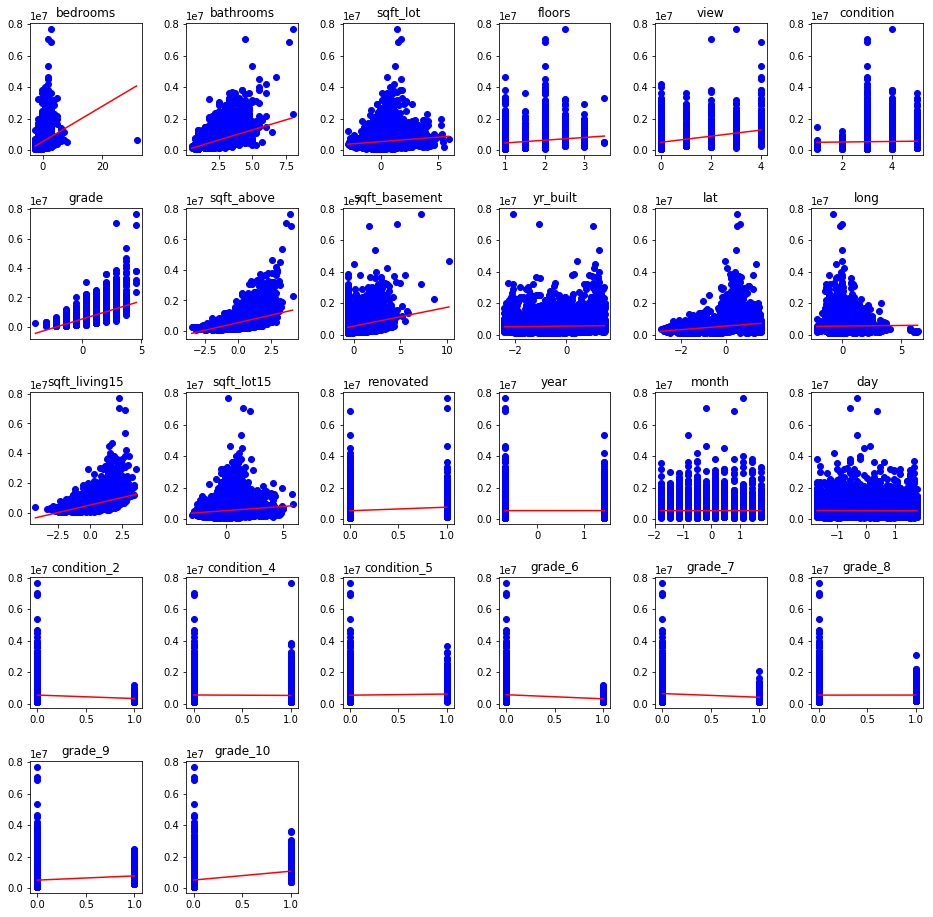

In [58]:
fig,axes=plt.subplots(ncols=6,nrows=5, figsize=(16,16))
i=0

for column in king_co_train:
    if column != 'price':
        f='price~'+ column
        single_model=ols(formula=f,data=king_co_train).fit()
        new_x=pd.DataFrame({column:[king_co_train[column].min(),king_co_train[column].max()]})
        new_y=single_model.predict(new_x)

        axes[i//6][i%6].scatter(king_co_train[column],king_co_train['price'],color='blue',label=column)
        axes[i//6][i%6].plot(new_x,new_y,color='red',label='regression')
        axes[i//6][i%6].set_title(column)
    
        i+=1
    else:
        continue

fig.delaxes(axes[4][2])
fig.delaxes(axes[4][3])
fig.delaxes(axes[4][4])
fig.delaxes(axes[4][5])
plt.subplots_adjust(hspace=0.4,wspace=0.4)

None of these look great.  The variables that look most linear are `bathrooms`, `sqft_lot`, `grade`, `sqft_above`, `sqft_basement`, and `sqft_living15`. 

### Normality

I'll check this out with QQ plots.

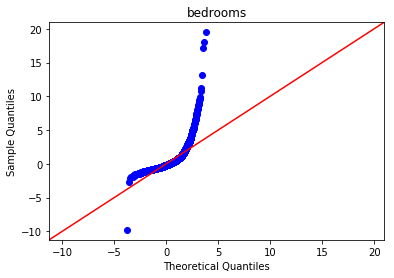

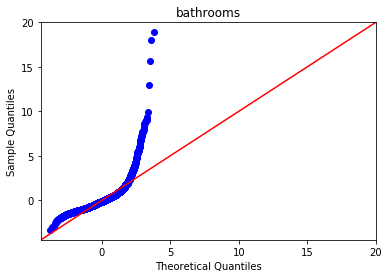

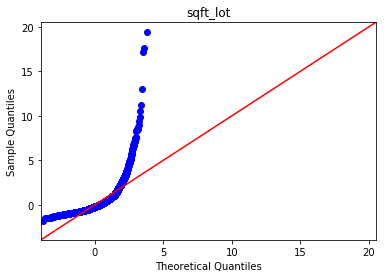

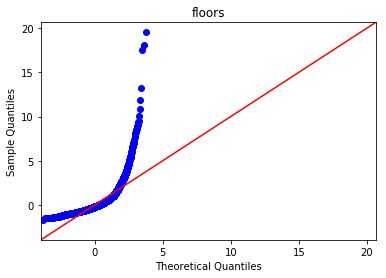

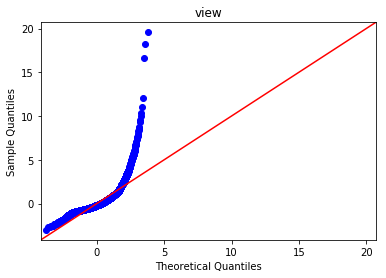

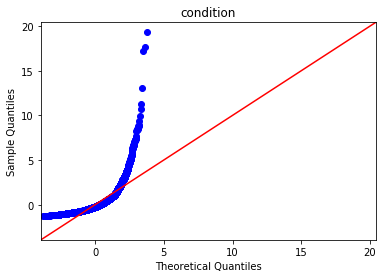

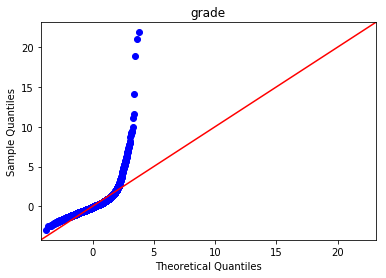

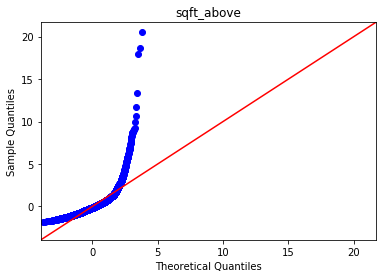

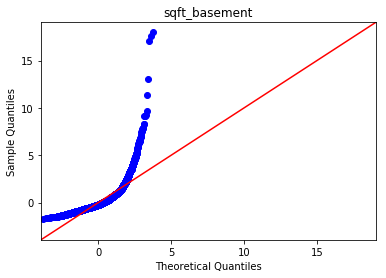

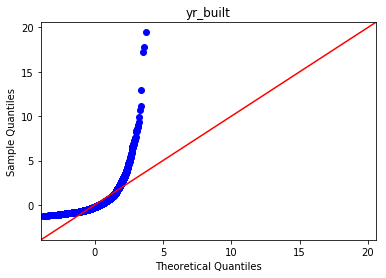

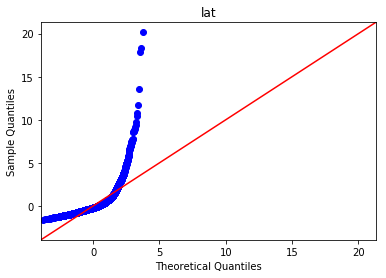

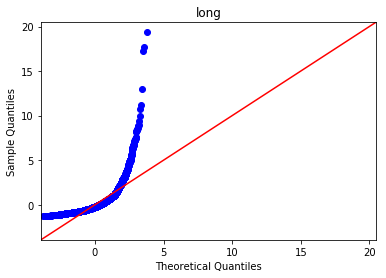

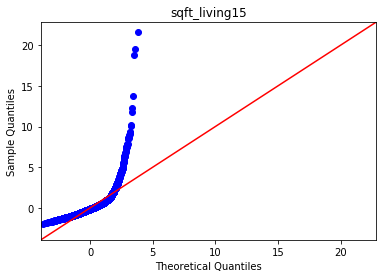

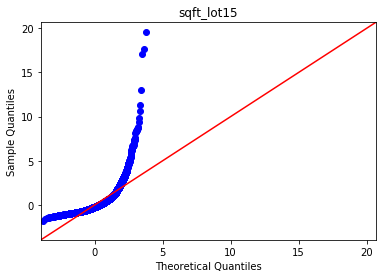

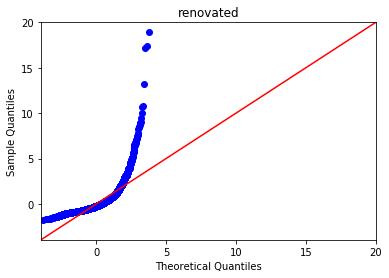

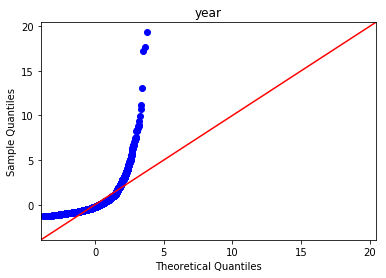

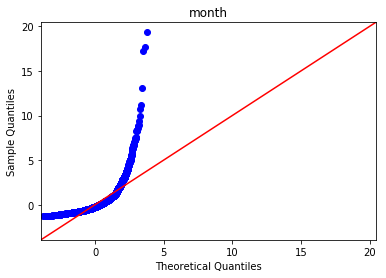

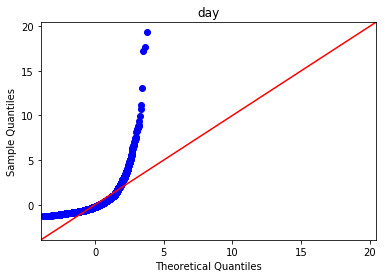

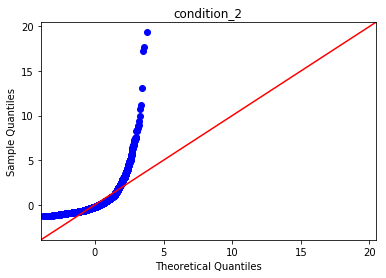

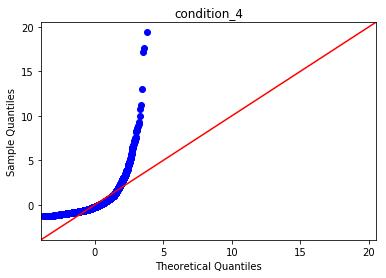

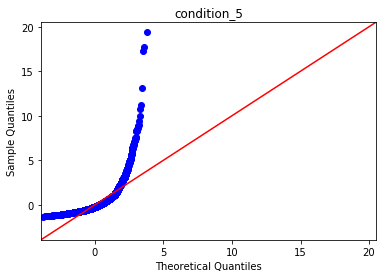

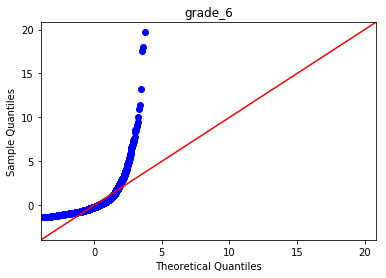

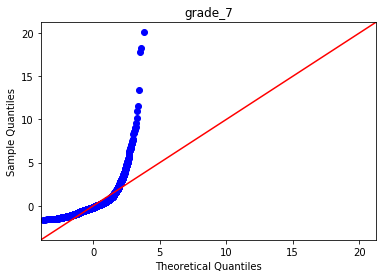

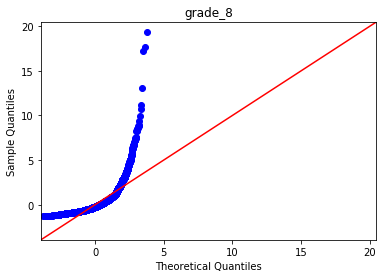

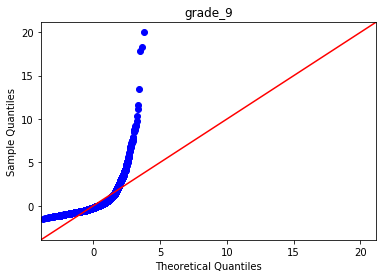

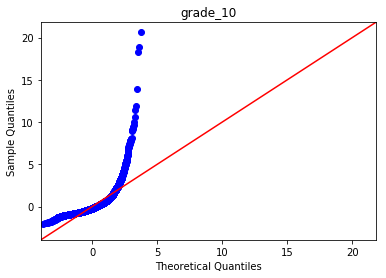

In [59]:
i=0
for column in king_co_train:
    if column != 'price':
        f='price~'+ column
        single_model=ols(formula=f,data=king_co_train).fit()
        residuals=single_model.resid
        
        sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
        plt.title(column)
    
        i+=1
    else:
        continue

Wow. None of those are even close to being normal.

### Homoscedasticity

I'll look at this using scatter plots.  I don't think any of these are going to be good though.

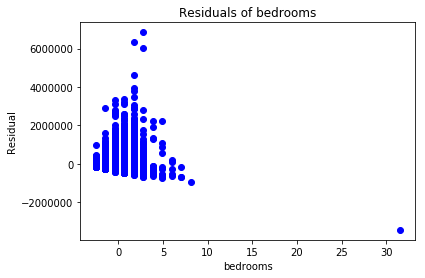

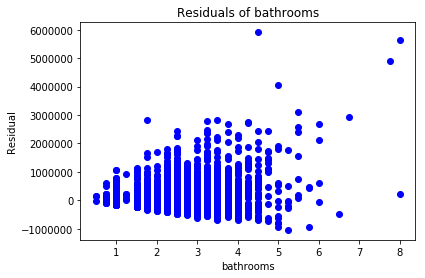

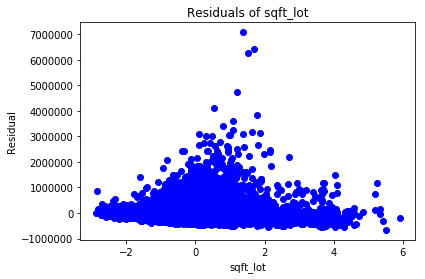

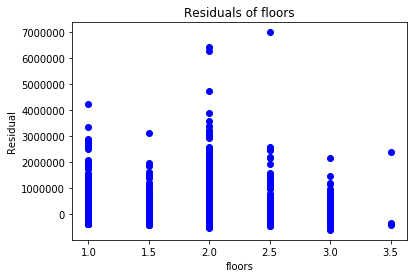

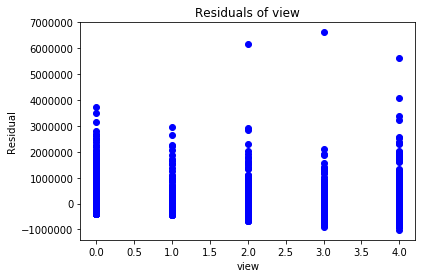

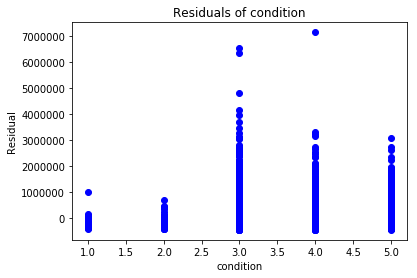

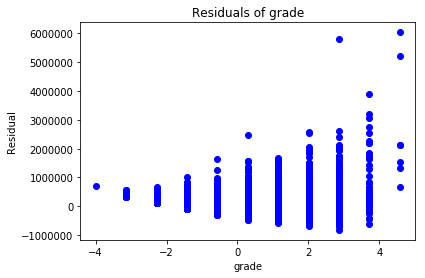

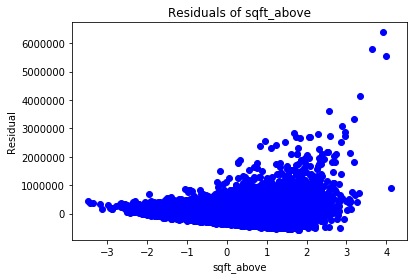

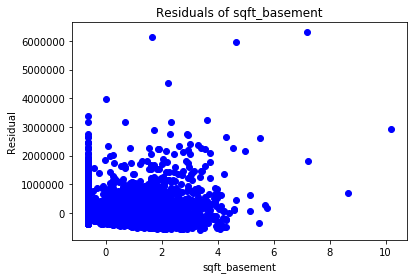

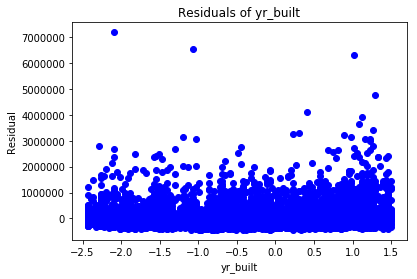

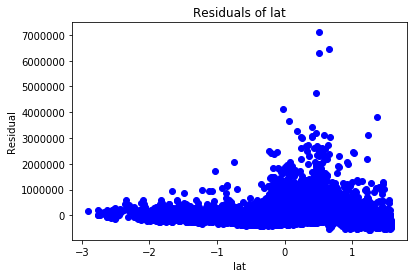

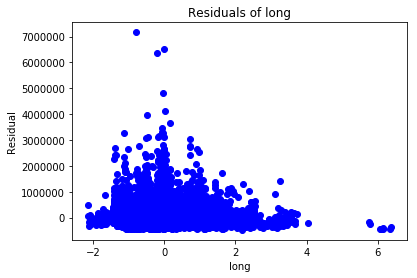

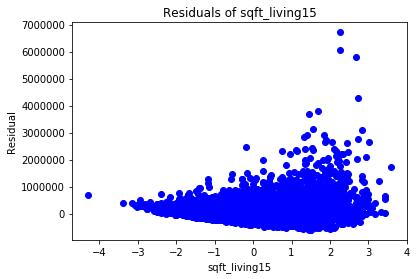

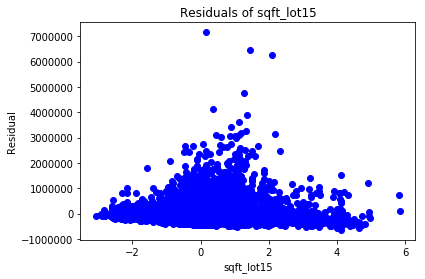

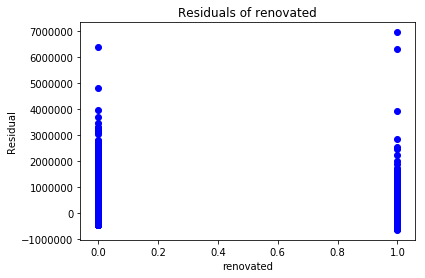

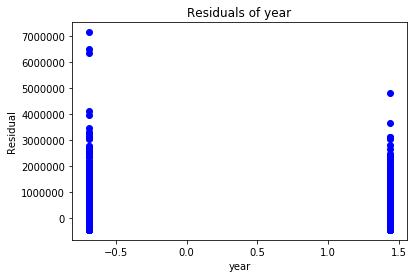

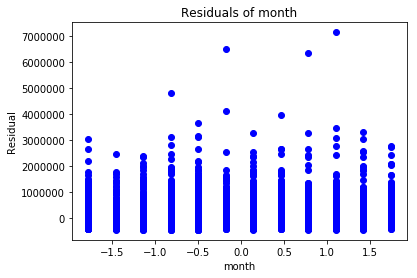

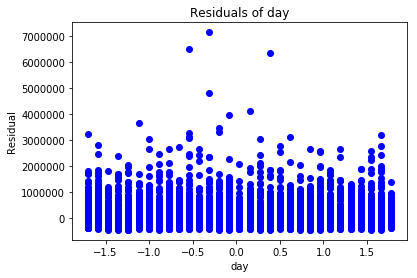

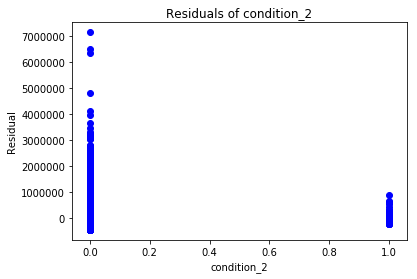

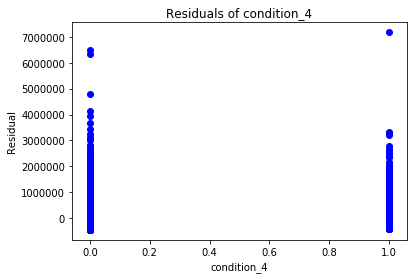

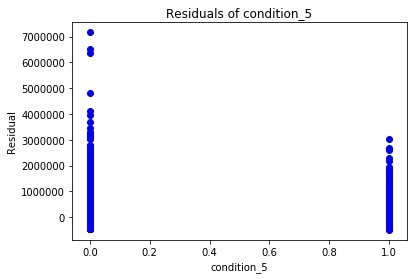

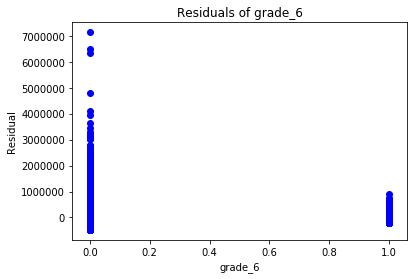

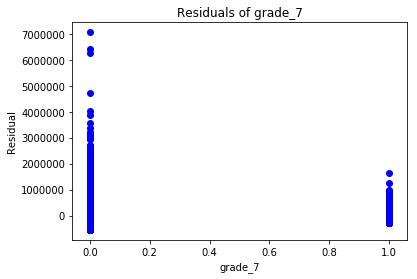

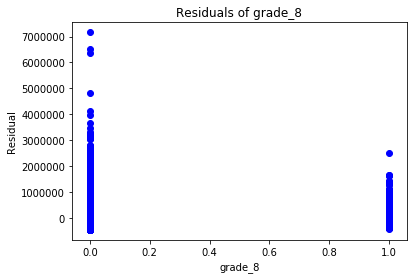

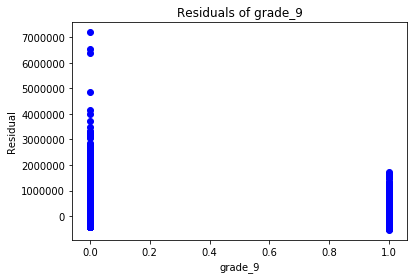

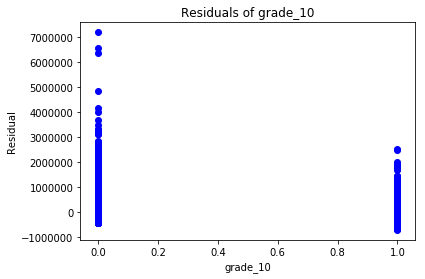

In [60]:
for column in king_co_train:
    if column!="price":
        f='price~'+column
        model=ols(formula=f,data=king_co_train).fit()
        residuals = model.resid

        plt.scatter(king_co_train[column],residuals,color="blue")
        plt.xlabel(column)
        plt.ylabel("Residual")
        plt.title("Residuals of "+column)
        plt.show()
    else:
        continue


Some of these look alright: `yr_built`, `month`, `day`.  Some of them are definitely not ok.

Overall, it doesn't look there are are any variables in particular that are great to use for this model.

# Recursive Feature Elimination

My current model has a lot of variables so I'm going to see if I can eliminate some of them to improve the performance of the model (or, worst case, leave it the same but with fewer inputs).

In [61]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(pred_int_one_hot, outcome['price'])
one_hot_variables=set(zip(selector.ranking_,pred_int_one_hot.columns,selector.support_))

selector = selector.fit(pred_int_not_one_hot, outcome['price'])
not_one_hot_variables=set(zip(selector.ranking_,pred_int_not_one_hot.columns,selector.support_))

In [62]:
one_hot_variables

{(1, 'grade_6', True),
 (1, 'grade_7', True),
 (1, 'grade_8', True),
 (1, 'grade_9', True),
 (2, 'renovated', False),
 (3, 'view', False),
 (4, 'grade_10', False),
 (5, 'sqft_above', False),
 (6, 'lat', False),
 (7, 'sqft_basement', False),
 (8, 'condition_2', False),
 (9, 'bathrooms', False),
 (10, 'yr_built', False),
 (11, 'condition_5', False),
 (12, 'condition_4', False),
 (13, 'sqft_living15', False),
 (14, 'long', False),
 (15, 'bedrooms', False),
 (16, 'sqft_lot15', False),
 (17, 'year', False),
 (18, 'month', False),
 (19, 'sqft_lot', False),
 (20, 'day', False),
 (21, 'floors', False),
 (22, 'const', False)}

In [63]:
not_one_hot_variables

{(1, 'bathrooms', True),
 (1, 'grade', True),
 (1, 'view', True),
 (1, 'yr_built', True),
 (2, 'lat', False),
 (3, 'sqft_above', False),
 (4, 'sqft_basement', False),
 (5, 'renovated', False),
 (6, 'bedrooms', False),
 (7, 'condition', False),
 (8, 'year', False),
 (9, 'sqft_living15', False),
 (10, 'long', False),
 (11, 'month', False),
 (12, 'sqft_lot15', False),
 (13, 'sqft_lot', False),
 (14, 'day', False),
 (15, 'floors', False),
 (16, 'const', False)}

So, I don't really know the best number of features to select.  I'm going to make a graph with different numbers of values vs. the adjusted R-squared to see what number of features works best.  First, I'll use the OneHot dataframe.

In [64]:
r_sq=[]
r_sq_adj=[]
number_of_variables=[]
n=outcome['price'].count()
i=1

while i<(len(pred_int_one_hot.columns)):
    selector = RFE(linreg, n_features_to_select = i)
    selector = selector.fit(pred_int_one_hot, outcome['price'])    
    chosen_columns = pred_int_one_hot.columns[selector.support_]
    linreg.fit(pred_int_one_hot[chosen_columns],outcome['price'])
    
    y_hat=linreg.predict(pred_int_one_hot[chosen_columns])
    mean_y=outcome.price.mean()
    
    ss_res=(np.power(outcome['price']-y_hat,2)).sum()
    ss_tot=(np.power(outcome['price']-mean_y,2)).sum()
    
    r_squared=1-(ss_res/ss_tot)
    r_squared_adj=1-(1-r_squared)*((n-1)/(n-i-1))
    r_sq.append(r_squared)
    r_sq_adj.append(r_squared_adj)
    number_of_variables.append(i)
    i+=1

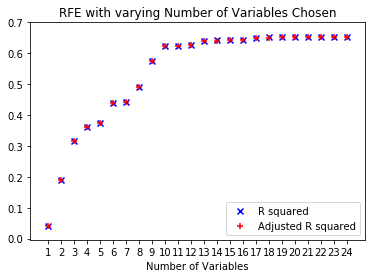

In [65]:
plt.scatter(number_of_variables,r_sq,label="R squared",color='blue',marker='x')
plt.scatter(number_of_variables,r_sq_adj,label="Adjusted R squared",color='red',marker='+')
plt.xticks(number_of_variables)
plt.title("RFE with varying Number of Variables Chosen")
plt.xlabel("Number of Variables")
plt.legend()
plt.show()

In [66]:
set(zip(number_of_variables,r_sq,r_sq_adj))

{(1, 0.042011730755374566, 0.04193797126436416),
 (2, 0.190101951252163, 0.1899772268279314),
 (3, 0.31447591161757316, 0.31431754320042016),
 (4, 0.3593819934040815, 0.35918465247020515),
 (5, 0.37388890948796605, 0.3736478007808989),
 (6, 0.43907841765825717, 0.4388191917864209),
 (7, 0.44077425717363006, 0.4404727181041659),
 (8, 0.4904777390280832, 0.4901637279281853),
 (9, 0.5731637924523751, 0.5728678351435978),
 (10, 0.621519508635318, 0.6212278987336579),
 (11, 0.6216656093461452, 0.6213449375710495),
 (12, 0.6245585564962477, 0.6242113809300887),
 (13, 0.6394831446119573, 0.6391219609559736),
 (14, 0.6404266723723251, 0.6400386934446343),
 (15, 0.6413967570396226, 0.640982154862622),
 (16, 0.6427976527966639, 0.6423571041529228),
 (17, 0.6474926118083997, 0.6470306456043249),
 (18, 0.6502032986406011, 0.649717881893668),
 (19, 0.6517552246224547, 0.651245074219049),
 (20, 0.652846759769802, 0.6523114012375633),
 (21, 0.65297786056647, 0.6524159030612183),
 (22, 0.6530053903272

There are a couple plateaus on the graph: at `0.0`, at around `0.5`, and at `0.65`.
Obviously, the first/lowest plateau isn't great to go with because that's a terrible R-squared value (and thus a terrible model).  The second one isn't great but the nice thing is that it only takes 7 variables to get there.  The third one has the best R-squared but it takes a lot more variables (18) to get up to it.  

Personally, I don't mind using 18 variables (especially since the computer will be doing all the work) but I can see how the complexity could be off-putting.

In [67]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 18)
selector = selector.fit(pred_int_one_hot, outcome['price'])
set(zip(selector.ranking_,pred_int_one_hot.columns,selector.support_))

{(1, 'bathrooms', True),
 (1, 'bedrooms', True),
 (1, 'condition_2', True),
 (1, 'condition_4', True),
 (1, 'condition_5', True),
 (1, 'grade_10', True),
 (1, 'grade_6', True),
 (1, 'grade_7', True),
 (1, 'grade_8', True),
 (1, 'grade_9', True),
 (1, 'lat', True),
 (1, 'long', True),
 (1, 'renovated', True),
 (1, 'sqft_above', True),
 (1, 'sqft_basement', True),
 (1, 'sqft_living15', True),
 (1, 'view', True),
 (1, 'yr_built', True),
 (2, 'sqft_lot15', False),
 (3, 'year', False),
 (4, 'month', False),
 (5, 'sqft_lot', False),
 (6, 'day', False),
 (7, 'floors', False),
 (8, 'const', False)}

Looking at this list, I see that it's using all of the conditions and all of the grades.  That seems like it might be overkill so I want to run all this again but without the OneHot enconding to see how that affects things.

In [68]:
r_sq=[]
r_sq_adj=[]
number_of_variables=[]
n=outcome['price'].count()
i=1

while i<(len(pred_int_not_one_hot.columns)):
    selector = RFE(linreg, n_features_to_select = i)
    selector = selector.fit(pred_int_not_one_hot, outcome['price'])    
    chosen_columns = pred_int_not_one_hot.columns[selector.support_]
    linreg.fit(pred_int_not_one_hot[chosen_columns],outcome['price'])
    
    y_hat=linreg.predict(pred_int_not_one_hot[chosen_columns])
    mean_y=outcome.price.mean()
    
    ss_res=(np.power(outcome['price']-y_hat,2)).sum()
    ss_tot=(np.power(outcome['price']-mean_y,2)).sum()
    
    r_squared=1-(ss_res/ss_tot)
    r_squared_adj=1-(1-r_squared)*((n-1)/(n-i-1))
    r_sq.append(r_squared)
    r_sq_adj.append(r_squared_adj)
    number_of_variables.append(i)
    i+=1

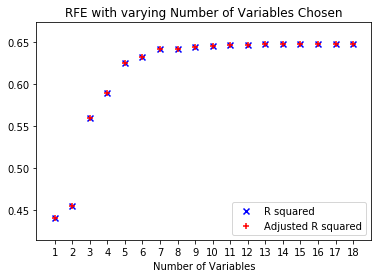

In [69]:
plt.scatter(number_of_variables,r_sq,label="R squared",color='blue',marker='x')
plt.scatter(number_of_variables,r_sq_adj,label="Adjusted R squared",color='red',marker='+')
plt.xticks(number_of_variables)
plt.title("RFE with varying Number of Variables Chosen")
plt.xlabel("Number of Variables")
plt.legend()
plt.show()

In [70]:
set(zip(number_of_variables,r_sq,r_sq_adj))

{(1, 0.43997208434033297, 0.43992896546786153),
 (2, 0.454409426873022, 0.45432540584073944),
 (3, 0.5595002246234968, 0.5593984612378406),
 (4, 0.5897251034851525, 0.589598719227466),
 (5, 0.6253202392830643, 0.625175954101026),
 (6, 0.6328462731653612, 0.632676595713231),
 (7, 0.6417612034708926, 0.641568038197768),
 (8, 0.6421586543059974, 0.6419381219305601),
 (9, 0.6444719488619597, 0.6442254348049302),
 (10, 0.6457084026120578, 0.6454354296577562),
 (11, 0.6470270278052216, 0.6467278520698122),
 (12, 0.6472073939008229, 0.646881162007998),
 (13, 0.6477304666195675, 0.6473775455395778),
 (14, 0.6479382933069286, 0.6475584194037531),
 (15, 0.6480158815096133, 0.6476089320894378),
 (16, 0.6480281637281908, 0.6475940660344924),
 (17, 0.6480628574181937, 0.6476016385295188),
 (18, 0.6480637174117128, 0.6475753315442708)}

In [71]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 11)
selector = selector.fit(pred_int_not_one_hot, outcome['price'])
set(zip(selector.ranking_,pred_int_not_one_hot.columns,selector.support_))

{(1, 'bathrooms', True),
 (1, 'bedrooms', True),
 (1, 'condition', True),
 (1, 'grade', True),
 (1, 'lat', True),
 (1, 'renovated', True),
 (1, 'sqft_above', True),
 (1, 'sqft_basement', True),
 (1, 'view', True),
 (1, 'year', True),
 (1, 'yr_built', True),
 (2, 'sqft_living15', False),
 (3, 'long', False),
 (4, 'month', False),
 (5, 'sqft_lot15', False),
 (6, 'sqft_lot', False),
 (7, 'day', False),
 (8, 'floors', False),
 (9, 'const', False)}

So, without all the OneHot encoding, it takes fewer variables to get to the same adjusted R-squared value.  It looks like this is the way to go (no OneHot encoding --> same R-squared but simpler model).

I'm going to try one more thing to figure out which predictors are best before I finalize the model.

## Stepwise Selection

In [72]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
result = stepwise_selection(pred_int_one_hot, outcome["price"], verbose = True)
print('resulting features:')
print(result)

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_living15                  with p-value 0.0
Add  lat                            with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  view                           with p-value 0.0
Add  yr_built                       with p-value 4.47243e-180
Add  sqft_above                     with p-value 1.75538e-182
Add  const                          with p-value 2.70964e-107
Add  sqft_basement                  with p-value 5.99148e-99
Add  grade_10                       with p-value 4.4482e-73
Add  bedrooms                       with p-value 9.06847e-47
Add  grade_8                        with p-value 1.48539e-27
Add  grade_7                        with p-value 5.14791e-79
Add  grade_6                        with p-value 4.70008e-54
Add  grade_9                        with p-value 1.99387e-167
Add  long                           with p-value 5.0652e-35
Add  sqft_lot15                     with p-value 1.54791e-11
Add  renovated                      with p-value 3.870

So, this is suggesting about 20 variables.  Let me check the R-squared/adjusted R-squared for that model.

In [73]:
n=outcome['price'].count()

linreg.fit(pred_int_one_hot[result],outcome['price'])
y_hat=linreg.predict(pred_int_one_hot[result])
mean_y=outcome.price.mean()
    
ss_res=(np.power(outcome['price']-y_hat,2)).sum()
ss_tot=(np.power(outcome['price']-mean_y,2)).sum()
    
r_squared=1-(ss_res/ss_tot)
r_squared_adj=1-(1-r_squared)*((n-1)/(n-i-1))

print(f"R-squared: {r_squared}")
print(f"Adj. R-squared: {r_squared_adj}")

R-squared: 0.6527741828306204
Adj. R-squared: 0.6522655251184988


Using the variables that were chosen by RFE gives me the same adjusted R-squared. It might be slightly higher but it's definitely more complicated.

Let's see what happens with the not OneHot encoding dataframe.

In [74]:
result = stepwise_selection(pred_int_not_one_hot, outcome["price"], verbose = True)
print('resulting features:')
print(result)

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_living15                  with p-value 0.0
Add  lat                            with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  const                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  view                           with p-value 4.62396e-232
Add  sqft_above                     with p-value 6.95671e-36
Add  sqft_basement                  with p-value 8.0074e-63
Add  bedrooms                       with p-value 1.1609e-20
Add  year                           with p-value 6.27128e-11
Add  condition                      with p-value 1.49114e-10
Add  renovated                      with p-value 1.90145e-06
Add  long                           with p-value 1.14516e-05
Add  month                          with p-value 0.005656
resulting features:
['sqft_living15', 'lat', 'bathrooms', 'grade', 'const', 'yr_built', 'view', 'sqft_above', 'sqft_basement', 'bedrooms'

In [75]:
linreg.fit(pred_int_not_one_hot[result],outcome['price'])
y_hat=linreg.predict(pred_int_not_one_hot[result])
mean_y=outcome.price.mean()
    
ss_res=(np.power(outcome['price']-y_hat,2)).sum()
ss_tot=(np.power(outcome['price']-mean_y,2)).sum()
    
r_squared=1-(ss_res/ss_tot)
r_squared_adj=1-(1-r_squared)*((n-1)/(n-i-1))

print(f"R-squared: {r_squared}")
print(f"Adj. R-squared: {r_squared_adj}")

R-squared: 0.6479382933069286
Adj. R-squared: 0.6474225514081493


About the same R-squared but with about 15 variables.

Looks like the best model to go with is no OneHot encoding with the top 11 variables: `bathrooms`, `bedrooms`, `condition`, `grade`, `lat`, `renovated`, `sqft_above`, `sqft_basement`, `view`, `year`, and `yr_built`.

In [76]:
final_predictors=king_co_train[['bathrooms','bedrooms',
                  'condition','grade','lat','renovated','sqft_above',
                  'sqft_basement','view','year','yr_built']]
final_predictors_int = sm.add_constant(final_predictors)
final_model = sm.OLS(outcome['price'],final_predictors_int).fit()
final_model.summary()

C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2163.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:53:40   Log-Likelihood:            -1.7818e+05
No. Observations:               12990   AIC:                         3.564e+05
Df Residuals:                   12978   BIC:                         3.565e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.709e+05   1.43e+04     18.884      0.000    2.43e+05    2.99e+05
bathrooms      7.904e+04   4402.339     17.955      0.000    7.04e+04    8.77e+04
bedrooms      -2.367e+04   2493.050     -9.495      0.000   -2.86e+04   -1.88e+04
condition      2.305e+04   3246.041      7.101      0.000    1.67e+04    2.94e+04
grade          1.533e+05   3285.568     46.661      0.000    1.47e+05     1.6e+05
lat            7.728e+04   2016.316     38.326      0.000    7.33e+04    8.12e+04
renovated      4.754e+04   1.03e+04      4.621      0.000    2.74e+04    6.77e+04
sqft_above     9.148e+04   3762.934     24.312      0.000    8.41e+04    9.89e+04
sqft_basement  4.896e+04   2503.486     19.558      0.000    4.41e+04    5.39e+04
view           8.656e+04   2757.310     31.392      0.000    8.12e+04     9.2e+04
year           1.344e+04   1929.671      6.963      0.000    9653.783    1.72e+04
yr_built      -8.846e+04   2734.730    -32.348      0.000   -9.38e+04   -8.31e+04
==============================================================================
Omnibus:                    13955.290   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3049941.634
Skew:                           5.042   Prob(JB):                         0.00
Kurtosis:                      77.386   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Testing!

And now to test it on the other set of data that I split off at the beginning. `x_test` and `y_test` haven't been cleaned or anything though so I'll need to do these things before I can run them through the model to see how well it works:
    * drop any rows that have `?` for the `sqft_basement` column and any `NaN` rows from `yr_renovated` and `view`
    * create the `year` and `renovated` columns
    * take the log of the `sqft_above` columns
    * normalize the `bedrooms`, `grade`, `lat`, `sqft_above`, `sqft_basement`, `yr_built` columns
(Note: these are exactly the same things I did to clean up the training data.)

In [77]:
king_co_test=x_test.join(y_test)
king_co_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 18155 to 7468
Data columns (total 21 columns):
id               5400 non-null int64
date             5400 non-null object
bedrooms         5400 non-null int64
bathrooms        5400 non-null float64
sqft_living      5400 non-null int64
sqft_lot         5400 non-null int64
floors           5400 non-null float64
waterfront       4820 non-null float64
view             5385 non-null float64
condition        5400 non-null int64
grade            5400 non-null int64
sqft_above       5400 non-null int64
sqft_basement    5400 non-null object
yr_built         5400 non-null int64
yr_renovated     4445 non-null float64
zipcode          5400 non-null int64
lat              5400 non-null float64
long             5400 non-null float64
sqft_living15    5400 non-null int64
sqft_lot15       5400 non-null int64
price            5400 non-null float64
dtypes: float64(8), int64(11), object(2)
memory usage: 1.1+ MB


1) Drop any rows that have `?` for the `sqft_basement` column and any `NaN` rows from `yr_renovated` and `view`

In [78]:
rows_to_drop=king_co_test.loc[king_co_test.sqft_basement=='?']
king_co_test.drop(rows_to_drop.index,axis=0,inplace=True)

In [79]:
king_co_test['sqft_basement']=king_co_test['sqft_basement'].astype('float64')

In [80]:
rows_to_drop=king_co_test.loc[king_co_test.yr_renovated.isnull()==True]
king_co_test.drop(rows_to_drop.index,axis=0,inplace=True)

In [81]:
rows_to_drop=king_co_test.loc[king_co_test.view.isnull()==True]
king_co_test.drop(rows_to_drop.index,axis=0,inplace=True)

2) Create the `year` and `renovated` columns

In [82]:
king_co_test.loc[king_co_test['yr_renovated']>=0.0,"renovated"]=1
king_co_test.loc[(king_co_test['yr_renovated']==0.0),"renovated"]=0

In [83]:
king_co_test.drop('yr_renovated',axis=1,inplace=True)

In [84]:
king_co_test['date']=pd.to_datetime(king_co_test['date'])
king_co_test['year'] = king_co_test['date'].dt.year

3) Take the log of the `sqft_above` columns

In [85]:
log_columns=['sqft_above']
for column in log_columns:
    king_co_test[column] = king_co_test[column].map(lambda x: np.log(x))

4) Normalize the `bedrooms`, `grade`, `lat`, `sqft_above`, `sqft_basement`, `yr_built` columns

In [86]:
normal_columns=['bedrooms', 'grade', 'lat', 'sqft_above', 
                'sqft_basement','yr_built']
for column in normal_columns:
    mean_column=mean_std_for_later[column]['mean']
    std_column=mean_std_for_later[column]['std']
    king_co_test[column] = king_co_test[column].map(lambda x: (x - mean_column)/std_column)

Now that the testing set has been cleaned up in exactly the same way as the training set, I'll split it into my input variables and output so that I can run in through my model and get the predicted prices.  Then I can compare those predictions with the actual prices to see how well my model did.

In [87]:
final_predictors_test=king_co_test[['bathrooms','bedrooms',
                  'condition','grade','lat','renovated','sqft_above',
                  'sqft_basement','view','year','yr_built']]
final_outcome_test=king_co_test['price']

In [88]:
final_pred_test_int=sm.add_constant(final_predictors_test)

And now to apply the model and figure out the RMSE, R-squared, adjusted R-squared and all that great stuff.

In [89]:
train_residuals=final_model.resid
train_residuals_squared=np.power(train_residuals,2)

y_hat_test=final_model.predict(final_pred_test_int)
test_residuals=np.subtract(final_outcome_test,y_hat_test)
test_residuals_squared=np.power(test_residuals,2)

mse_train = np.sum(train_residuals_squared)/len(train_residuals)
mse_test =np.sum(test_residuals_squared)/len(test_residuals)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print(f'Difference: {mse_test-mse_train}')
print(f'Ratio: {mse_test/mse_train}')

Train Mean Squared Error: 48062580493.69623
Test Mean Squared Error: 732478126094573.8
Difference: 732430063514080.0


Because the MSE for the test dataset is a lot higher than the MSE for the training dataset, I think the model is over-fitted to the training set. My guess would be that some of the variables I've included don't actually need to be there so I'm going to drop them, refit the model, and see what happens.

Looking through my list of predictors, I think that the possible extraneous variables might be the year in which the house sold and the latitude.  I can see the location being important but the latitude by itself doesn't make a whole lot of sense as a predictor.  The year in which the house sold might be a good predictor after the fact but it's not something that would help a realtor set the selling price of a house that's about to go on the market.

In [90]:
extraneous_variables=['lat','year']

In [91]:
final_predictors_int.drop(extraneous_variables,axis=1,inplace=True)
final_pred_test_int.drop(extraneous_variables,axis=1,inplace=True)

In [92]:
final_model = sm.OLS(outcome['price'],final_predictors_int).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2220.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:55:00   Log-Likelihood:            -1.7889e+05
No. Observations:               12990   AIC:                         3.578e+05
Df Residuals:                   12980   BIC:                         3.579e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.919e+05   1.51e+04     19.292      0.000    2.62e+05    3.22e+05
bathrooms       8.96e+04   4640.097     19.310      0.000    8.05e+04    9.87e+04
bedrooms      -2.645e+04   2631.752    -10.049      0.000   -3.16e+04   -2.13e+04
condition      1.109e+04   3410.790      3.250      0.001    4401.115    1.78e+04
grade          1.776e+05   3401.451     52.212      0.000    1.71e+05    1.84e+05
renovated      3.235e+04   1.09e+04      2.980      0.003    1.11e+04    5.36e+04
sqft_above     7.793e+04   3956.853     19.695      0.000    7.02e+04    8.57e+04
sqft_basement  5.095e+04   2643.720     19.272      0.000    4.58e+04    5.61e+04
view            7.82e+04   2902.519     26.940      0.000    7.25e+04    8.39e+04
yr_built      -1.113e+05   2818.621    -39.505      0.000   -1.17e+05   -1.06e+05
==============================================================================
Omnibus:                    12416.696   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1866824.840
Skew:                           4.202   Prob(JB):                         0.00
Kurtosis:                      61.125   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fingers crossed, the MSE for the testing dataset will go down.

In [93]:
train_residuals=final_model.resid
train_residuals_squared=np.power(train_residuals,2)

y_hat_test=final_model.predict(final_pred_test_int)
test_residuals=np.subtract(final_outcome_test,y_hat_test)
test_residuals_squared=np.power(test_residuals,2)

mse_train = np.sum(train_residuals_squared)/len(train_residuals)
mse_test =np.sum(test_residuals_squared)/len(test_residuals)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print(f'Difference: {mse_test-mse_train}')
print(f'Ratio: {mse_test/mse_train}')

Train Mean Squared Error: 53628692010.08924
Test Mean Squared Error: 52917138419.15971
Difference: -711553590.9295273
Ratio: 0.9867318488618805


That seems a lot better - maybe slightly underfitted - but I'm going to call it.  Here's my final model.

In [94]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2220.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:55:20   Log-Likelihood:            -1.7889e+05
No. Observations:               12990   AIC:                         3.578e+05
Df Residuals:                   12980   BIC:                         3.579e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.919e+05   1.51e+04     19.292      0.000    2.62e+05    3.22e+05
bathrooms       8.96e+04   4640.097     19.310      0.000    8.05e+04    9.87e+04
bedrooms      -2.645e+04   2631.752    -10.049      0.000   -3.16e+04   -2.13e+04
condition      1.109e+04   3410.790      3.250      0.001    4401.115    1.78e+04
grade          1.776e+05   3401.451     52.212      0.000    1.71e+05    1.84e+05
renovated      3.235e+04   1.09e+04      2.980      0.003    1.11e+04    5.36e+04
sqft_above     7.793e+04   3956.853     19.695      0.000    7.02e+04    8.57e+04
sqft_basement  5.095e+04   2643.720     19.272      0.000    4.58e+04    5.61e+04
view            7.82e+04   2902.519     26.940      0.000    7.25e+04    8.39e+04
yr_built      -1.113e+05   2818.621    -39.505      0.000   -1.17e+05   -1.06e+05
==============================================================================
Omnibus:                    12416.696   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1866824.840
Skew:                           4.202   Prob(JB):                         0.00
Kurtosis:                      61.125   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The top three variables that most effect the price are...

#### 3rd Place: Bathrooms!
It looks like the variable that has the third biggest effect on the price is `bathrooms`.  Adding 1 bathroom to a house (assuming nothing else changes) increases the price of the house by nearly 89,000 dollars. Surprisingly, as the number of bedrooms increases, the prices decreases (adding a bedroom lowers the price of the house by 26,500 dollars).  

#### 2nd Place: Year Built!
As the year increases (as in, the more recently a house was built), the lower the price.  For an increase of one standard deviation of years, the price drops about 111,000 dollars.  This seems backwards but maybe newer houses are smaller? Less historical (and thus less valuable?)  This definitely needs some more exploration.  

#### 1st place: Grade!
The variable that has the biggest effect on the price is the grade of the house.  The higher the grade, the higher the price.  For every standard deviation increase, the price goes up almost 180,000 dollars. 

So, to get the highest price for your house in King County, fill it with bathrooms, build it a long time ago, and make sure it's a mansion constructed with only the finest materials.